In [1]:
from scipy.io import loadmat
import numpy as np
from scipy import optimize as opt 
from matplotlib import pyplot as plt

In [2]:
data=loadmat('ex3data1.mat')

In [3]:
X=data['X']
Y=data['y']

In [4]:
m,n=X.shape

In [5]:
Y.shape

(5000, 1)

In [6]:
"""in matlab there is no 0 index so they mapped 0 to 10 but we have so we can use"""
Y[Y==10]=0


In [7]:
def DisplayData(X,m):
    _,axarr=plt.subplots(10,10,figsize=(10,10))
    for i in range(10):
        for j in range(10):
            axarr[i,j].imshow(X[np.random.randint(m)].reshape(20,20,order='F'))
            axarr[i,j].axis("off")

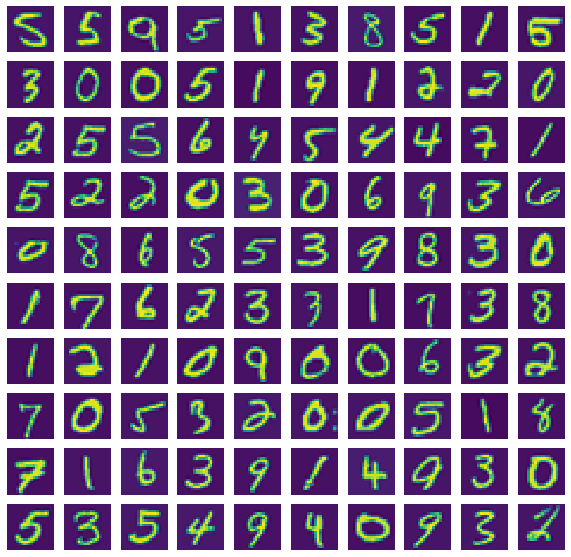

In [8]:
DisplayData(X,m)

In [9]:
def sigmoid(z):
    temp=-z
    temp=np.exp(temp)
    temp=1+temp
    temp=1.0/temp
    return temp

In [10]:
def costfunctionreg(theta,X,Y,lamda):
    m,n=X.shape
    theta=theta[:,np.newaxis]
    Y=Y[:,np.newaxis]
    temp=X@theta
    temp=sigmoid(temp)
    J=Y.T@np.log(temp)+((1-Y).T)@np.log(1-temp)
    J=-1/m*J.T
    J=J+(lamda/(2*m))*theta[1:,:].T@theta[1:,:]
    
    return J
def Gradientreg(theta,X,Y,lamda):
    m,n=X.shape
    Y=Y[:,np.newaxis]
    theta=theta[:,np.newaxis]
    grad=(1/(m))*(X.T@(sigmoid(X@theta)-Y))
    temp=grad[0]
    grad=grad+(lamda/m)*theta
    grad[0]=temp
    return grad

In [11]:
theta_t = np.array([[-2], [-1] ,[1], [2]])
X_t = np.concatenate([np.ones((5, 1)), np.arange(1, 16).reshape(5, 3, order='F')/10.0], axis=1)
y_t = np.array([1, 0, 1, 0, 1])
lambda_t = 3;
costfunctionreg(theta_t.flatten(),X_t,y_t,lambda_t)

array([[2.5348194]])

In [12]:
ones = np.ones((m,1))
X=np.hstack((ones,X))

In [13]:
def onevsall(X,Y,num_labels,lamda):
    all_theta=np.zeros((num_labels,n+1))
   
    for i in range(num_labels):
        intial_theta=np.zeros(n+1)
        temp=opt.fmin_tnc(func=costfunctionreg,fprime=Gradientreg,x0=intial_theta,args=(X,(Y==i).flatten(),lamda))
        theta=temp[0]
        print(costfunctionreg(theta,X,(Y==i).flatten(),lamda))
        all_theta[i,:]=theta.T
    return all_theta

In [14]:
lamda=0.1

In [15]:
all_theta=onevsall(X,Y,10,lamda)

[[0.00856785]]
[[0.01311468]]
[[0.0508019]]
[[0.05760174]]
[[0.03306495]]
[[0.0544561]]
[[0.01825592]]
[[0.0306414]]
[[0.07844901]]
[[0.07118539]]


In [16]:
predict=X@all_theta.T

In [17]:
predict.shape

(5000, 10)

In [18]:
predict=np.argmax(predict,axis=1)

In [19]:
predict.shape

(5000,)

In [20]:
predict.shape

(5000,)

In [21]:
accuracy=np.mean(predict==Y.flatten())*100

In [22]:
print(f"accuracy={accuracy}")

accuracy=96.46000000000001
